**This is my ML Task for IEEE Round-2. **


I was asked to implement linear regression from scratch for that I started watching lectures in order to get familier with the concepts of liner regression and to implement them using python and it's libraries.

As far as the mathematical part is concerned, from what I've understood by watching a series of Youtube videos, Liner Regression is a type of predictive analysis where we predict how a variable would behave, based on the behaviour of the similar datapoints provided earlier.
There are two types of regressions, simple and multiple.

As the name suggests, simple liner regression is when your dependant variable is only dependant on one other variable. Here, mathematically speaking, you'll plot all the data points and draw a straight line such that the error is minimum and the value of the incoming data is now prodicted based on that line.
Like if we have data of 3 houses and their prices based on which floor the flat is present. Say H1(house 1) is present on 1st floor and cost 10K, H2 on 2nd and costs 30K and H3 on 3rd floor and costs 50K and we are told to pridict the cost of H4 which is present on 5th floor. Now with the help of liner regression, we'll  first plot of the datapoints on a cost vs floor graph and drawn a straight line such that the sum of mod or square of distance each point from the line is minimum, hence we say the error is minimum. Now we can simply use the graph to predict what would be the value of a house which is present on the fifth floor.


Moving on to the Multiple Liner Regression, just like simple, he also involves dependance on a base variable, but now on two or more other variable. Say we consider the same old example but now we are also given the carpet area of the flats, now we have 2 variables on which the price of the flat depends, floor and carpet area.
Earlier in simple regression we plotted a graph of a straight line i.e y=mx+c or f(x)=mx+c,
but since here we have mutiple variables we will have to plot the graph of f(x1,x2)=c+m1x1+m2x2 where f(x1,x2) is the value of our base variable, c is the intercept, m1 m2 are the weights of two factors on which the base variable depends and x1 x2 are the value of the 2 factors. If the value of our base variable depends on n factors then the equation would be, f(x1,x2,x3,....xn)=c+m1x1+m2x2+m3x3+......mn*xn. Now based on the available data we will calculate the value of all m and c and then use the equation to predict the value of new coming data.



**Working in Python**



In order to impliment the regression model, we will first have to calculate the optimum value of m and c for a set of datapoints for which error is miminum. And that is when 
m=(Summation of (x- mean(x))*(y-mean(y)))/(Summation of ((x- mean(x))^2))

where mean(x) is the mean of all values of x and mean(y) is the mean of all corresponding values of y.

and then the optimum c value will be calculated by mean(y)=m*mean(x) + c

There also a concept of R-squared value which is calculated by
R^2 = Summation of (predicted(y) - mean(y))^2/Summation of (y-mean(y))^2

Higher the value of calculated R, lower the error in our plot, hence higher the accuracy of our model.

**Now lets work on our python model:**

**Simple Liner Regression Model:**

This is a Simple Liner Regression Model to pridict the pobability of having diabetes on basis of your insulin model.

It takes in 500 datapoints taken from a dataset form Kaggle.

In [ ]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import math 
import operator
import io

In [ ]:
#To import the dataset
from google.colab import files
dataset = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
data = pd.read_csv(io.BytesIO(dataset['diabetes.csv']))

In [ ]:
#To make a list of all values
X = data['Insulin'].values
Y = data['Outcome'].values
x=[X[i] for i in range(500)]
y=[Y[i] for i in range(500)]

In [ ]:
#To get the mean values
mean_x=np.mean(x)
mean_y=np.mean(y)

In [ ]:
#To get the values of m and c
num=0
dem=0

for i in range (len(x)):
  num=num+((x[i]-mean_x)*(y[i]-mean_y))
  dem=dem+(x[i]-mean_x)**2

m=num/dem
c=mean_y-(m*mean_x)

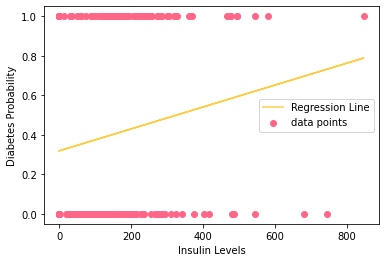

In [ ]:
#to plot the graph
max_x = np.max(x) + 100
min_x = np.min(y) - 100

Y = np.linspace (min_x, max_x, 500)
Y = c + m * X

plot.plot(X, Y, color='#ffcd45', label='Regression Line')
plot.scatter(x, y, c='#ff6688', label='data points')

plot.xlabel('Insulin Levels')
plot.ylabel('Diabetes Probability')
plot.legend()
plot.show()

In [ ]:
#To calculate the error in predictions
y_predicted=[m*x[i]+c for i in range(500)]

total=0
for i in range(500):
  total=total+((y_predicted[i]-y[i])**2)
error=total/500
print(error)

0.22709987786349264


**Multiple Liner Regression Model:**


In order to build a multiple liner regression model from scratch, first I needed to find out how to calculate the optimum values of weights and constant such that the overall error in computation is minimum. After researching a little, I found this matrix method by which, if X is the matrix of all values of x of all data points in the equation y=m1x1+m2x2+.......mn*xn+c (Note the value of x corresponding to c is taken as 1) and C is the matrix  of all weights and constants c then Y, which is the matrix of corresponding outcomes
will be equal to Y=X*C (Matrix Multiplication). This equation is then later used to predict the outcome Y from the input test values X, after finding matrix C.

Then, after a series of mathematical computation on the error function, it was dereived that for C=(X-transpose * X)-inverse * X-transpose * y, the value of error function would be minimum. Where y is the matrix of input outcome values from the datapoints.

Also, before running our computation we have to normalise our data, which we do by the formula x(normalised) =(x-x(min))/(x(max)-x(min))
min and max x are the minimum and maximum values of the corresponding x in the given dataset.

Normalisation is done because the features collected here are all in different ranges so in order to have a fair impact of each on the prediction, we normalise it first. Example, the bmi range from aorund 20-60 but the insulin levels range form 0-1000, but that don't necessarily mean insulin has more impact on the predictions. Hence, we normalise the data before using it for predicitions.

Then before showing the prediction, we have to de-normalise it because the contutaions were done on the normalised data, hence the prediction done was also normalised one. We do it by using the formula, y_denormalised= y_calculated*(y(max)-y(min))+y(min)

Now after reeserching, I created a Multiple Liner Regression Model to pridict the pobability of having diabetes on basis of your Glucose,Blood Pressure, Insulin, BMI and Age.

It takes in 768 datapoints taken from a dataset form Kaggle.

In [69]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import math 
import operator
import io

In [70]:
from numpy.linalg import inv

In [71]:
#To import the dataset
from google.colab import files
dataset = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [72]:
data = pd.read_csv(io.BytesIO(dataset['diabetes.csv']))

In [73]:
#To remove the columns not required in this model
data=data.drop(columns=['Pregnancies','SkinThickness','DiabetesPedigreeFunction'])

In [74]:
#To calculate the maximum and minimum in each column
max_values=[data[i].max() for i in data.columns]
min_values=[data[i].min() for i in data.columns]

In [75]:
#To manipulate the data according to the mentioned formula
arr=data.values
for i in range(len(data.columns)):
  for j in range(768):
    arr[j][i]=(arr[j][i]-min_values[i])/(max_values[i]-min_values[i])


In [76]:
#To split the values of x and y
X=[]
Y=[]
a=data.shape
for i in range(a[0]):
  X.append((arr[i][:-1]).tolist())
  Y.append(arr[i][-1])


In [77]:
#To calculate the value of matrix C according to the above mentioned formula
one=np.ones((768,1))
X=np.matrix(X)
X=np.concatenate((one,X),axis=1)     
X_transpose=X.T
z=np.linalg.inv(np.matmul(X_transpose,X))
Y=np.matrix(Y)
Y=Y.T
f=np.matmul(z,X_transpose)
C=np.matmul(f,Y)


In [78]:
#To take input and display the prediction done my the model
X_test=[[1]]
for i in range(5):
  value=[float(input("Enter the Value - "))]
  X_test.append(value)

for i in range(5):
  X_test[i+1][0]=(X_test[i+1][0]-min_values[i])/(max_values[i]-min_values[i])

X_test=np.matrix(X_test)
Y_test=np.matmul(C.T,X_test)


predict=Y_test*(max_values[-1]-min_values[-1])+min_values[-1]
print("Probabilty of having Diabetes:",predict[0][0])


Enter the Value - 180
Enter the Value - 70
Enter the Value - 0
Enter the Value - 26.5
Enter the Value - 40
[[0.67624452]]


This was all I gathered about Linear Regression in past few hours. Since I was already familier with the codes used in numpy library(as I am very well acquainted with Matlab), understanding the syntax and implementing it wasn't difficult either. I found this very interesting and am definitely looking forward to exploring more.